# Transformación de los datos para las visualizaciones
De acuerdo con lo revisado, inicialmente el dashboard de visualizaciones se va a componer de 2 tabs:
- Tab 1: Va a contener las siguientes visualizaciones:
    - A. Número de estudiantes del IPP.
    - B. Tasa de éxito académico.
    - C. Tasa de deserción.
    - D. Gráfico que compara si el estudiante es becado o no vs si es exitoso o desertor.
    - E. Gráfico de barras con los programas académicos y el porcentaje de estudiantes exitosos y desertores por cada programa.
- Tab 2.
    - F. Diagrama de Sankey que muestra el flujo de las notas de los estudiantes por semestre.

Para ello se tiene que tomar el archivo `data_raw.csv` y transformarlo para que se puedan generar las visualizaciones. Para ello se van a realizar las siguientes transformaciones:
- **I. [Generación de la base de datos](#i-generación-de-la-base-de-datos-data_vizcsv) `data_viz.csv`**
    1. [Seleccionar las columnas que se van a utilizar.](#1-seleccionar-columnas-necesarias)
    2. [Eliminar los registros que no se van a utilizar (Target = "Enrolled").](#2-eliminar-registros-que-no-se-van-a-utilizar)
    3. [Discretizar las variables continuas.](#3-discretizar-variables-continuas)
    4. [Exportar el archivo transformado.](#4-exportar-el-archivo-transformado)
- **II. Consultas para gráficos**
    1. [A. Número de estudiantes del IPP.](#a-número-de-estudiantes-del-ipp)
    2. [B. Tasa de éxito académico.](#b-tasa-de-éxito-académico)
    3. [C. Tasa de deserción.](#c-tasa-de-deserción)
    4. [D. Gráfico que compara si el estudiante es becado o no vs si es exitoso o desertor.](#d-gráfico-que-compara-si-el-estudiante-es-becado-o-no-vs-si-es-exitoso-o-desertor)
    5. [E. Gráfico de barras con los programas académicos y el porcentaje de estudiantes exitosos y desertores por cada programa.](#e-gráfico-de-barras-con-los-programas-académicos-y-el-porcentaje-de-estudiantes-exitosos-y-desertores-por-cada-programa)
    6. [F. Diagrama de Sankey que muestra el flujo de las notas de los estudiantes por semestre.](#f-diagrama-de-sankey-que-muestra-el-flujo-de-las-notas-de-los-estudiantes-por-semestre)

## I. Generación de la base de datos `data_viz.csv`
### 1. Seleccionar columnas necesarias
Las columnas que se van a utilizar son:
| Índice | Variable                           | Descripción                                           |
| ------ | ---------------------------------- | ----------------------------------------------------- |
| 36     | `Target`                           | Variable objetivo.                                    |
| 15     | `Debtor`                           | Variable que indica si el estudiante es deudor o no.  |
| 16     | `Scholarship`                      | Variable que indica si el estudiante es becado o no.  |
| 3      | `Course`                           | Variable que indica el programa académico.            |
| 12     | `Admission grade`                  | Variable que indica el promedio de admisión.          |
| 25     | `Curricular units 1st sem (grade)` | Variable que indica el promedio del primer semestre.  |
| 31     | `Curricular units 2nd sem (grade)` | Variable que indica el promedio del segundo semestre. |

In [26]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Leer el archivo csv y guardarlo en un dataframe
df = pd.read_csv("data_raw.csv", sep=";")

# Seleccionar las columnas necesarias
columns_to_select = [
    'Target', 'Debtor', 'Scholarship holder', 'Course', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'
]

# Crear un nuevo dataframe con las columnas seleccionadas
df_selected = df[columns_to_select]
df_selected.head()

,Target,Debtor,Scholarship holder,Course,Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,Dropout,0,0,171,127.3,0.000000,0.000000
1,Graduate,0,0,9254,142.5,14.000000,13.666667
2,Dropout,0,0,9070,124.8,0.000000,0.000000
3,Graduate,0,0,9773,119.6,13.428571,12.400000
4,Graduate,0,0,8014,141.5,12.333333,13.000000


### 2. Eliminar registros que no se van a utilizar
Se excluyen los registros que tienen como target "Enrolled".

In [28]:
# df_selected = df_selected[df_selected['Target'] != 'Enrolled']

### 3. Discretizar variables continuas
Antes de discretizar, vale la pena revisar la distribución de las variables continuas para explorar formas de discretizar.

In [29]:
# Describir las variables admisson grade, curricular units 1st sem (grade) y curricular units 2nd sem (grade)
df_selected[['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].describe()

,Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
count,4424.000000,4424.000000,4424.000000
mean,126.978119,10.640822,10.230206
std,14.482001,4.843663,5.210808
min,95.000000,0.000000,0.000000
25%,117.900000,11.000000,10.750000
50%,126.100000,12.285714,12.200000
75%,134.800000,13.400000,13.333333
max,190.000000,18.875000,18.571429


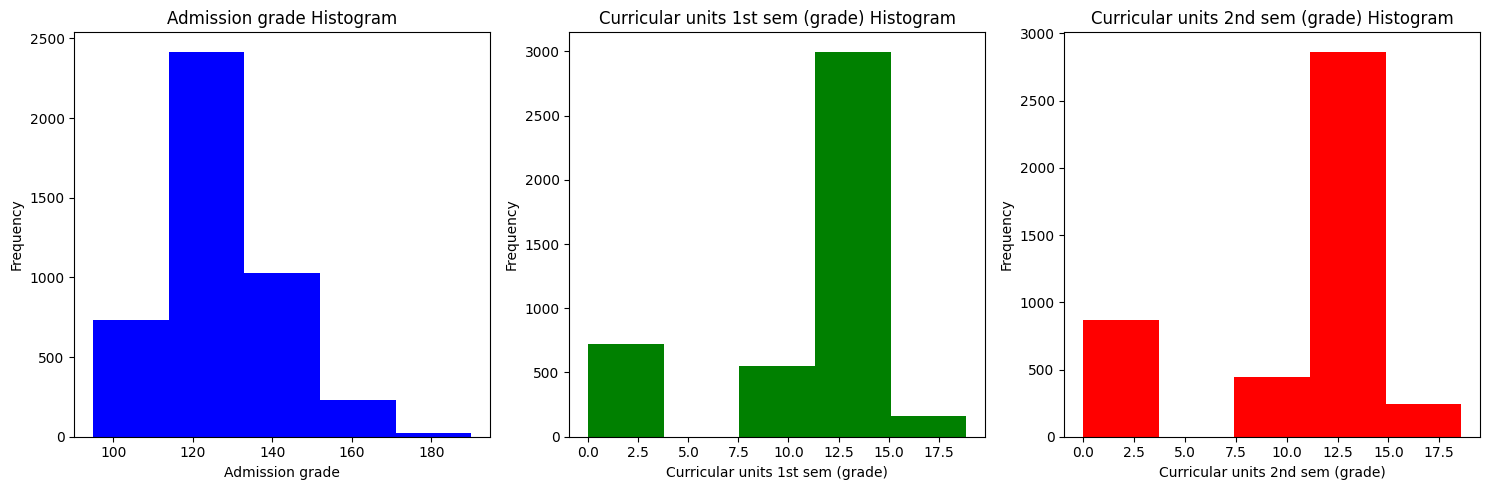

In [30]:
# Variables a graficar
variables_to_plot = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Crear subplots para los histogramas
fig, axs = plt.subplots(1, len(variables_to_plot), figsize=(15, 5))

for i, variable in enumerate(variables_to_plot):
    axs[i].hist(df[variable], bins=5, color=['blue', 'green', 'red'][i])
    axs[i].set_title(f'{variable} Histogram')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Frequency')

# Mostrar los histogramas
plt.tight_layout()
plt.show()


Después de experimentar con varias formas de discretizar, se encontró que de acuerdo con la [Partner Information Fact Sheet](https://www.ipportalegre.pt/media/filer_public/06/68/06684969-eeb7-467a-ab6e-053db7fe41a2/fact_sheet.pdf),
 el sistema de calificación del sistema educativo portugués tiene la siguiente escala de desempeño:
- Less than 10 : FAIL (F)
- 10: Minimum pass grade (E)
- 11 - 12: SUFFICIENT (D)
- 13 - 14: GOOD (C)
- 15 – 17: VERY GOOD (B)
- 18 - 20: EXCELLENT (A)

Por ende, se decidió discretizar las variables continuas de la siguiente manera:

In [31]:
# Crear una función para discretizar los puntajes
def discretize_grades(score):
    if score < 10:
        return 'F: FAIL'  # FAIL
    elif 10 <= score < 11:
        return 'E: PASS'  # Minimum pass grade
    elif 11 <= score < 13:
        return 'D: SUFFICIENT'  # SUFFICIENT
    elif 13 <= score < 15:
        return 'C: GOOD'  # GOOD
    elif 15 <= score < 18:
        return 'B: VERY GOOD'  # VERY GOOD
    elif 18 <= score <= 20:
        return 'A: EXCELLENT'  # EXCELLENT

In [32]:
# Crear df_transformed como una copia de df_selected
df_transformed = df_selected.copy()

# Aplicar la función discretize_grades a la columna Admission grade pero dividiendo por 10 antes de aplicar la función
df_transformed['Admission grade'] = df_selected['Admission grade'].apply(lambda x: x / 10).apply(discretize_grades)

# Aplicar la función discretize_grades a la columna Curricular units 1st sem (grade) y a la columna Curricular units 2nd sem (grade)
df_transformed['Curricular units 1st sem (grade)'] = df_selected['Curricular units 1st sem (grade)'].apply(discretize_grades)
df_transformed['Curricular units 2nd sem (grade)'] = df_selected['Curricular units 2nd sem (grade)'].apply(discretize_grades)


---
Validamos que la transformación sea consistente.

In [33]:
# Crear un nuevo DataFrame con las columnas especificadas
new_df = pd.DataFrame({
    'Admission grade (Selected)': df_selected['Admission grade'],
    'Admission grade (Transformed)': df_transformed['Admission grade'],
    'Curricular units 1st sem grade (Selected)': df_selected['Curricular units 1st sem (grade)'],
    'Curricular units 1st sem grade (Transformed)': df_transformed['Curricular units 1st sem (grade)'],
    'Curricular units 2nd sem grade (Selected)': df_selected['Curricular units 2nd sem (grade)'],
    'Curricular units 2nd sem grade (Transformed)': df_transformed['Curricular units 2nd sem (grade)'],
})

# Seleccionar aleatoriamente 10 registros
new_df_sampled = new_df.sample(n=10)

# Mostrar el nuevo DataFrame con 10 registros seleccionados aleatoriamente
new_df_sampled.head(10)

,Admission grade (Selected),Admission grade (Transformed),Curricular units 1st sem grade (Selected),Curricular units 1st sem grade (Transformed),Curricular units 2nd sem grade (Selected),Curricular units 2nd sem grade (Transformed)
667,129.1,D: SUFFICIENT,12.818182,D: SUFFICIENT,13.545455,C: GOOD
3549,121.5,D: SUFFICIENT,13.483333,C: GOOD,13.483333,C: GOOD
3013,119.4,D: SUFFICIENT,13.833333,C: GOOD,13.500000,C: GOOD
564,123.2,D: SUFFICIENT,14.166667,C: GOOD,13.625000,C: GOOD
978,155.5,B: VERY GOOD,10.600000,E: PASS,14.666667,C: GOOD
1524,141.7,C: GOOD,0.000000,F: FAIL,0.000000,F: FAIL
1997,122.4,D: SUFFICIENT,12.857143,D: SUFFICIENT,13.333333,C: GOOD
3636,125.7,D: SUFFICIENT,13.000000,C: GOOD,11.666667,D: SUFFICIENT
399,96.0,F: FAIL,10.666667,E: PASS,0.000000,F: FAIL
3411,120.0,D: SUFFICIENT,12.454286,D: SUFFICIENT,12.454286,D: SUFFICIENT


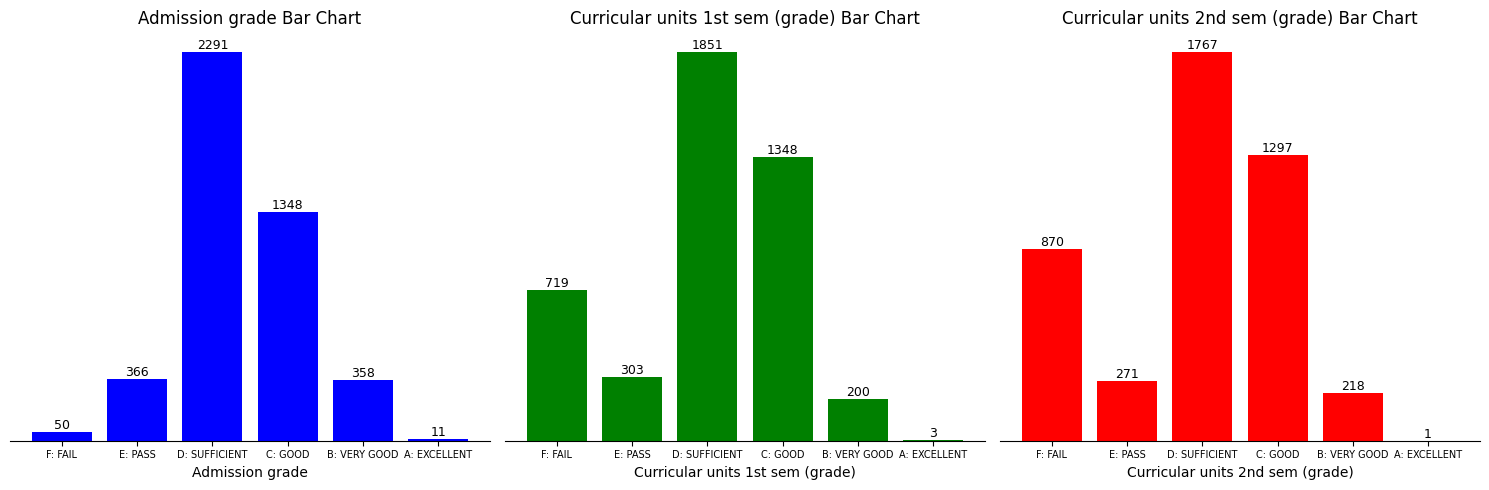

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
colors = ['blue', 'green', 'red']

for i, column in enumerate(['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']):
    ax = axs[i]
    data = df_transformed[column].value_counts().sort_index(ascending=False)
    
    ax.bar(
        data.index,
        data.values,
        color=colors[i],
    )
    
    ax.set_title(f'{titles[i]} Bar Chart')
    ax.set_xlabel(titles[i])
    ax.set_yticks([])  # Elimina los valores del eje y
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Colocar las frecuencias como etiquetas dentro de las barras o encima si no caben
    for index, value in enumerate(data.values):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=9)

    # Girar las etiquetas del eje x para evitar superposición
    ax.tick_params(axis='x', labelsize=7)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


### 4. Exportar el archivo transformado.

In [38]:
# Cambiar ruta y activar la línea de código para guardar el archivo según sea necesario
# output_file_path_long = 'C:/Users/zaida/OneDrive - Universidad de los Andes/2_Analitica_Computacional/ACTD_P2/pages/data_viz.csv'
output_file_path = 'data_viz.csv'
df_transformed.to_csv(output_file_path, sep=',', index=False)
df_transformed.head()

,Target,Debtor,Scholarship holder,Course,Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,Dropout,0,0,171,D: SUFFICIENT,F: FAIL,F: FAIL
1,Graduate,0,0,9254,C: GOOD,C: GOOD,C: GOOD
2,Dropout,0,0,9070,D: SUFFICIENT,F: FAIL,F: FAIL
3,Graduate,0,0,9773,D: SUFFICIENT,C: GOOD,D: SUFFICIENT
4,Graduate,0,0,8014,C: GOOD,D: SUFFICIENT,C: GOOD


## II. Consultas para gráficos
### A. Número de estudiantes del IPP.

In [39]:
# Valor para Graph A: Card con el número de registros
df_graph_a = len(df_transformed)
print(f'Students in database: {df_graph_a}')

Students in database: 4424


### B. Tasa de éxito académico.

### C. Tasa de deserción.

In [40]:
# El valor de df_graph_c es igual a valores de la variable Target iguales a 'Dropout' divididos en df_graph_a
df_graph_c = round(len(df_transformed[df_transformed['Target'] == 'Dropout']) / df_graph_a*100, 2)
print(f'Dropout students: {df_graph_c}')

Dropout students: 32.12
